In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn.modules.container import Sequential
import matplotlib.pyplot as plt

In [3]:
class PerceptronNet(nn.Module):
    def __init__(self):
        super(PerceptronNet, self).__init__()

        self.layer = Sequential(
            nn.Linear(1, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 1)
        )

    def forward(self, x):
        return self.layer(x)

In [10]:
class RegressionDemo:

    def __init__(self):
        self.x = np.array(np.random.rand(10**5) * 2 * np.pi, dtype=np.float32)
        self.y = np.sin(self.x)

        self.x = self.x.reshape(-1,1)
        self.y = self.y.reshape(-1,1)

        self.device  = "cuda" if torch.cuda.is_available() else "cpu"

    def start_training(self):

        x_tensor = torch.from_numpy(self.x).requires_grad_().to(self.device)
        y_tensor = torch.from_numpy(self.y).to(self.device)
        
        self.model = PerceptronNet().to(self.device)

        criterion = nn.MSELoss()
        optimizer = torch.optim.SGD(self.model.parameters(), lr=1e-6)

        epochs = 100

        for i in range(epochs):

            y_pred = self.model(x_tensor)

            loss = criterion(y_pred, y_tensor)

            loss.backward()

            optimizer.step()

            optimizer.zero_grad()

            if (i+1)%10 == 0:
                print("Epoch:",i,"Loss:",loss.item())

    def prediction(self):
        x_tensor = torch.from_numpy(self.x).to(self.device).requires_grad_()
        pred = self.model(x_tensor).to('cpu').detach().numpy()
        plt.plot(self.x,self.y, '.')
        plt.plot(self.x, pred, '-')
        plt.show()

Epoch: 9 Loss: 0.4891575872898102
Epoch: 19 Loss: 0.48904767632484436
Epoch: 29 Loss: 0.4889432191848755
Epoch: 39 Loss: 0.488843709230423
Epoch: 49 Loss: 0.4887484610080719
Epoch: 59 Loss: 0.4886571168899536
Epoch: 69 Loss: 0.48856937885284424
Epoch: 79 Loss: 0.4884851276874542
Epoch: 89 Loss: 0.48840394616127014
Epoch: 99 Loss: 0.4883258640766144


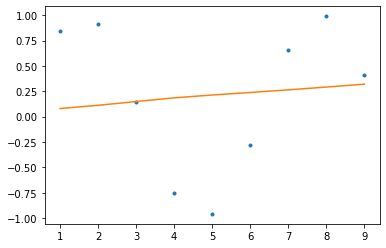

In [11]:
rd = RegressionDemo()
rd.start_training()
rd.prediction()